In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Mapa
import folium

# Procesamiento de datos
from sklearn.preprocessing import MinMaxScaler

# Modelo
from sklearn.linear_model import LinearRegression

# Separar train y test
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [84]:
df = pd.read_csv("housing.csv")

In [85]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [86]:
df.shape

(20640, 10)

### Vemos las estadísticas del dataset

In [87]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [89]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Visualizamos la relación entre columnas con la variable objetivo "median_income"

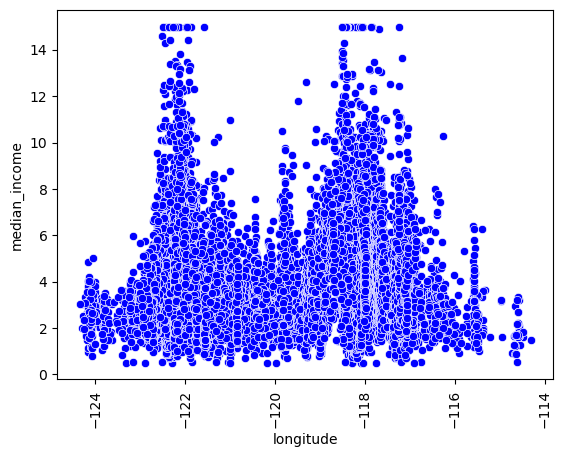

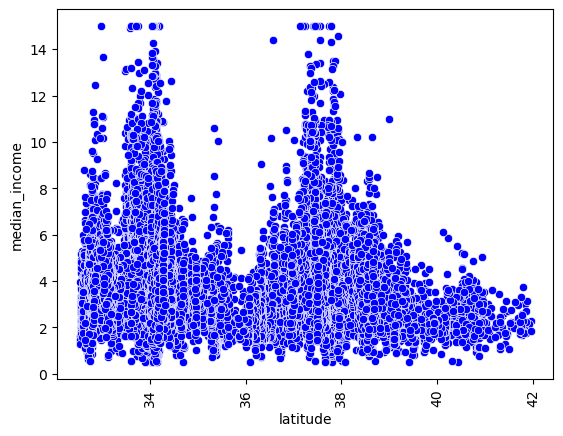

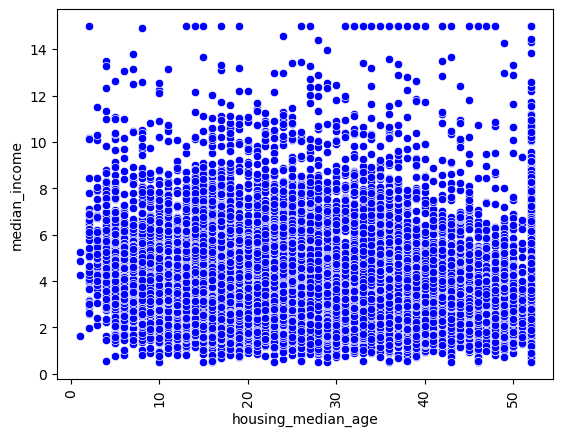

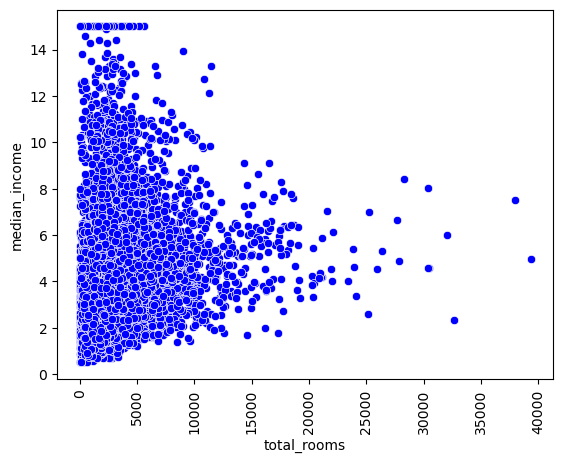

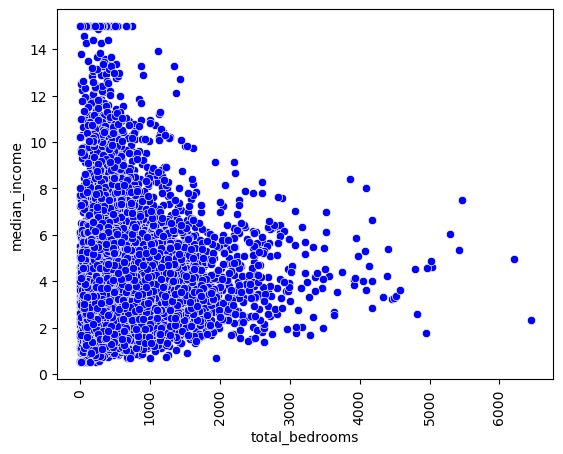

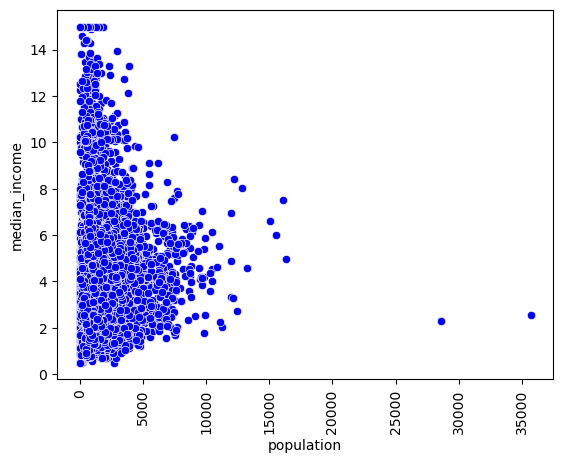

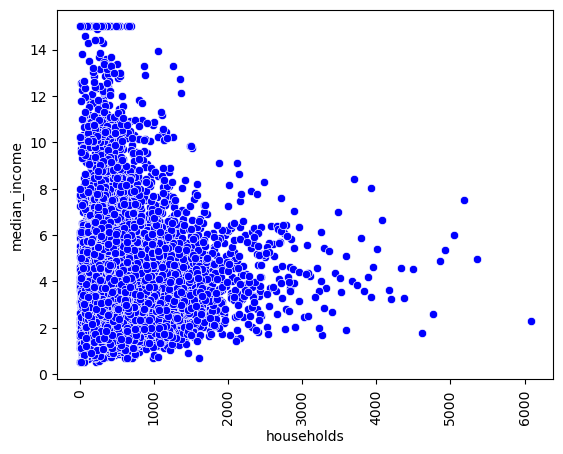

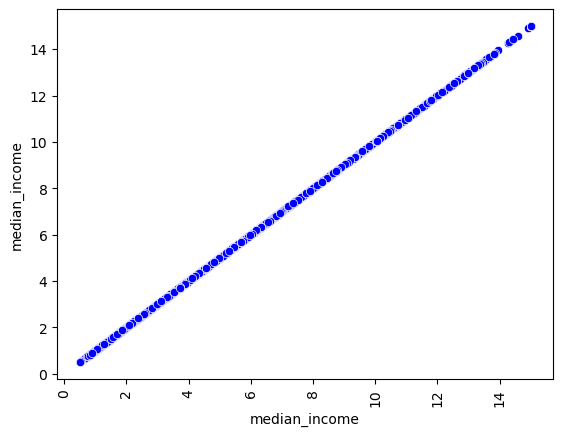

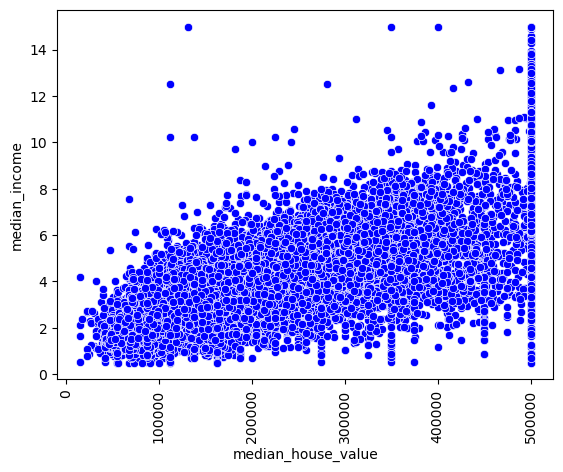

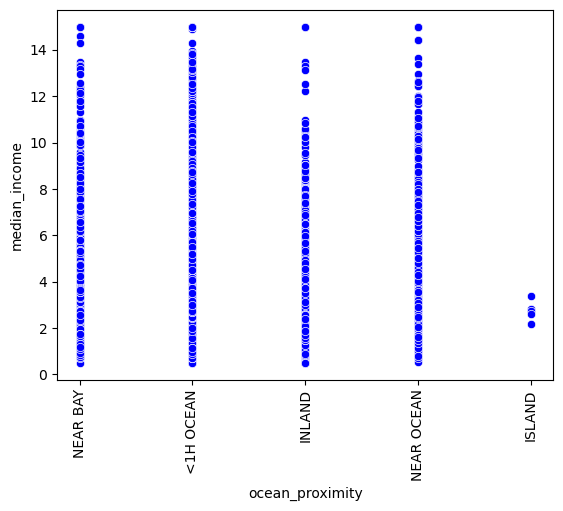

In [90]:
for col in df.columns:
    sns.scatterplot(x = df[col], y = df["median_income"], color = "b")
    plt.xticks(rotation = 90)
    plt.show()

### Analizamos los nulos

In [91]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [92]:
total_rows = len(df)
missing_rows = df['total_bedrooms'].isna().sum()

percentage_missing = (missing_rows / total_rows) * 100
print(f'Percentage of Missing Values: {percentage_missing:.2f}%')

Percentage of Missing Values: 1.00%


In [93]:
rows_with_na = df[df['total_bedrooms'].isna()]
print(rows_with_na)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  media

In [94]:
unique_class_name = rows_with_na['ocean_proximity'].unique()
unique_class_name

array(['NEAR BAY', 'INLAND', 'NEAR OCEAN', '<1H OCEAN'], dtype=object)

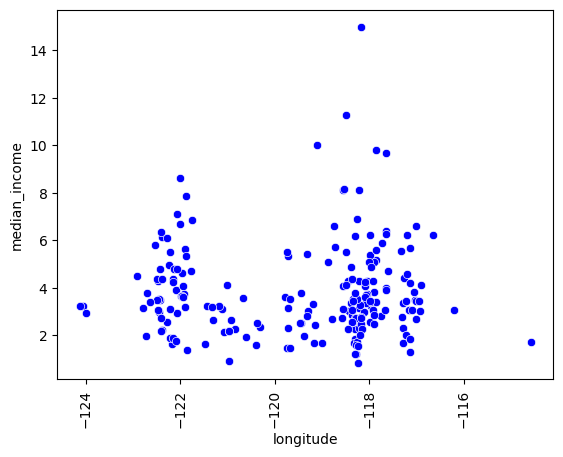

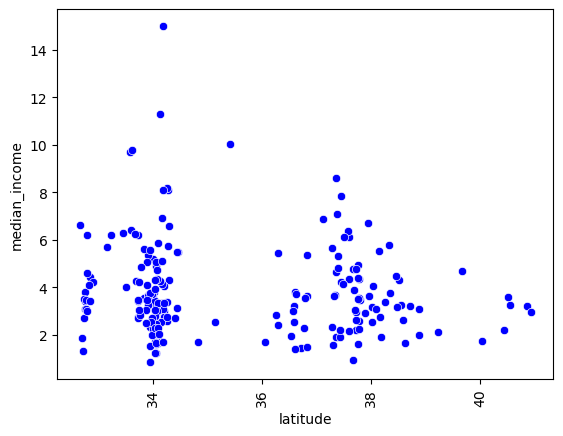

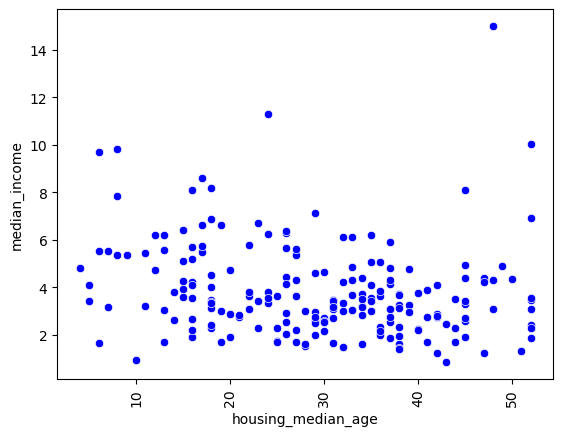

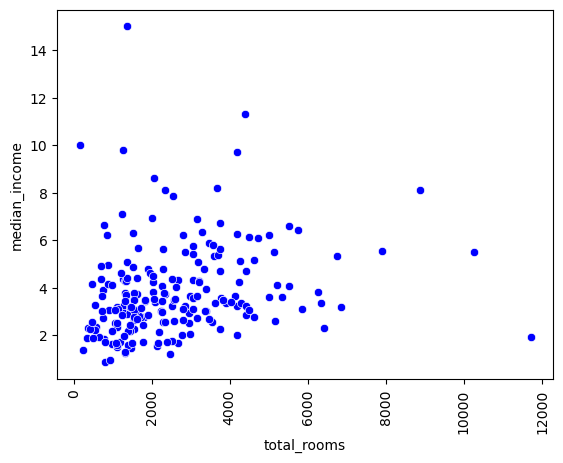

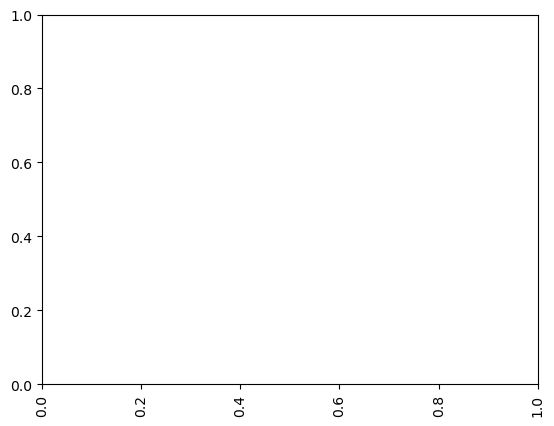

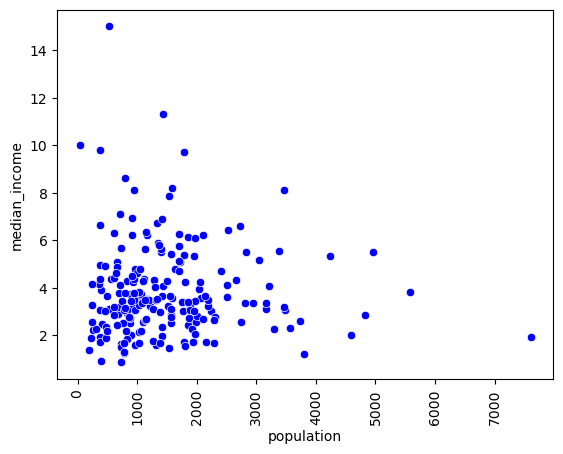

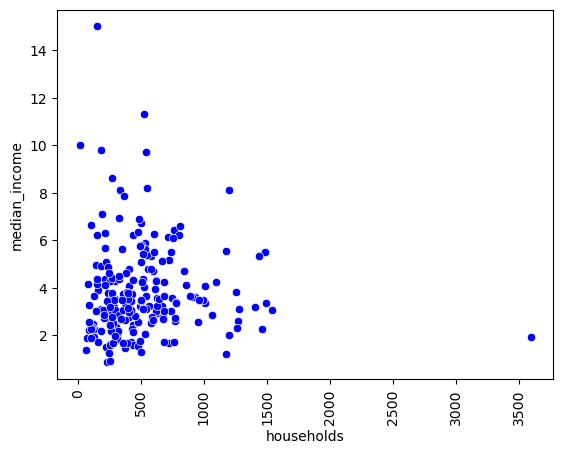

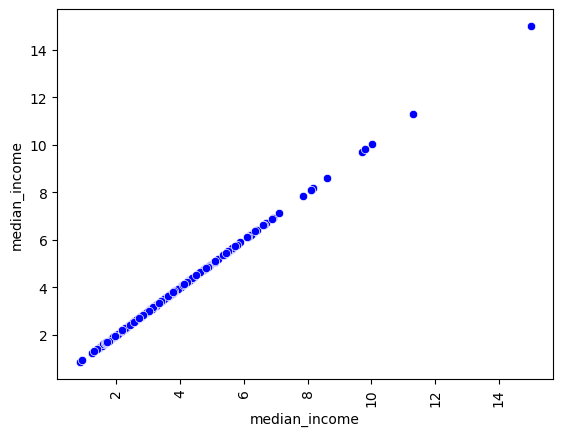

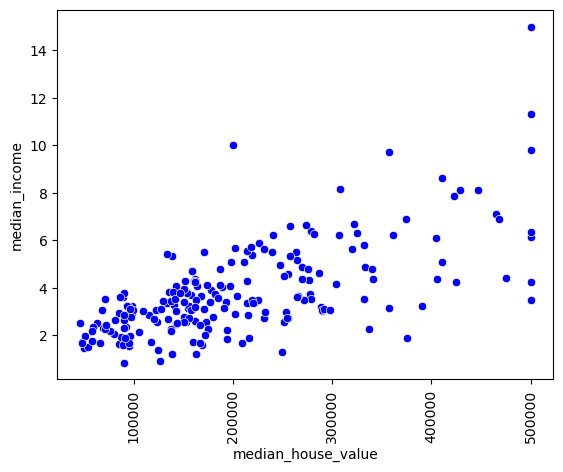

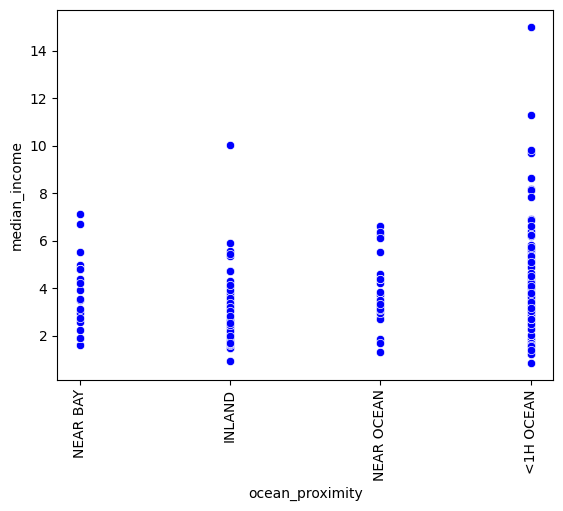

In [95]:
for col in df.columns:
    sns.scatterplot(x = rows_with_na[col], y = rows_with_na["median_income"], color = "b")
    plt.xticks(rotation = 90)
    plt.show()

El subconjunto de nulos se comporta muy similar al total de la población del dataset, asimismo sólo representa un 1% del total por lo que eliminarlo es la mejor solución.

### Borramos los nulos en lugar de trabajarlos porque son muy pocos en comparación con la cantidad de datos que tenemos.


In [96]:
df.dropna(inplace=True)

### Verificación del dataset una vez eliminadas las filas vacías.

In [97]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [98]:
df.shape

(20433, 10)

### No hay duplicados

In [99]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


### Vemos el tipo de dato de las columnas

In [100]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Evaluamos si los números luego de la coma son ceros antes de cambiar los tipos de datos.

In [110]:
for column in df.columns:
    if df[column].dtype == float:
        all_integers = (df[column] % 1 == 0).all()
        
        print(f"All numbers are integers in column '{column}':", all_integers)
        
        if all_integers:
            df[column] = df[column].astype(int)
            print(f"Column '{column}' converted to integers.")
        else:
            print(f"There are some numbers that are not pure integers in column '{column}'.")
    else:
        print(f"No check needed for column '{column}' as it is not float.")

All numbers are integers in column 'longitude': False
There are some numbers that are not pure integers in column 'longitude'.
All numbers are integers in column 'latitude': False
There are some numbers that are not pure integers in column 'latitude'.
No check needed for column 'housing_median_age' as it is not float.
No check needed for column 'total_rooms' as it is not float.
No check needed for column 'total_bedrooms' as it is not float.
No check needed for column 'population' as it is not float.
No check needed for column 'households' as it is not float.
All numbers are integers in column 'median_income': False
There are some numbers that are not pure integers in column 'median_income'.
No check needed for column 'median_house_value' as it is not float.
No check needed for column 'ocean_proximity' as it is not float.


### Cambiamos el tipo de dato de las columnas numéricas a int

In [111]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

### Analizando si la columna categórica tiene datos erróneos y repetidos

In [103]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Correlación entre variables cuantitativas

In [104]:
df_columns = df[["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]]

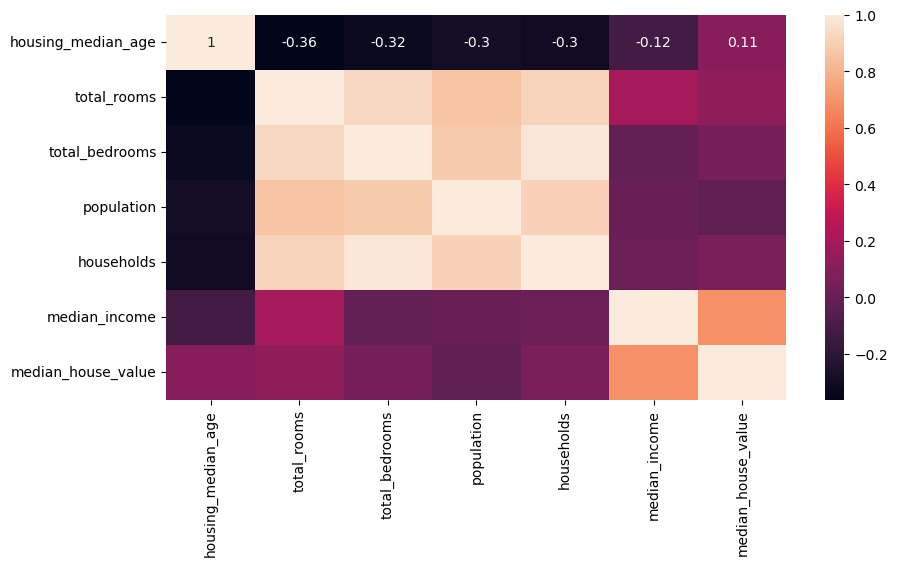

In [105]:
plt.figure(figsize = (10,5))
sns.heatmap(data= df_columns.corr().round(3), annot = True)
plt.show()

### Media de ingreso está en 10miles

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

In [106]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [107]:
non_int_rows = df[df['total_bedrooms'] % 1 != 0]

# Print the rows where the column values are not pure integers
print("Rows where the column values are not pure integers:")
print(non_int_rows)

Rows where the column values are not pure integers:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [108]:
df["median_income"] = df["median_income"]*10000

### Mapa

In [109]:
data = json.load(open('caCountiesTopoSimple.json'))

NameError: name 'json' is not defined

In [ ]:
california_map = folium.Map(location=[0,0], zoom_start=0)
ocean = folium.map.FeatureGroup()

coor_classes = {}

for index, row in df.iterrows():
    coordinates = (row["latitude"], row["longitude"])
    folium.Marker(location=coordinates).add_to(california_map)

In [ ]:
map.save('california_map.html')

AttributeError: type object 'map' has no attribute 'save'